In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import os

In [57]:
def DRE():
    # Lista de tickers das empresas. Adicione as empresas que desejar
    tickers = ['WEGE3.SA', 'EMBR3.SA', 'ITUB4.SA']

    # Dicionário para armazenar os DataFrames com os nomes dinâmicos
    dataframes = {}

    # Loop para baixar a Demonstração de Resultados Anual de cada empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre_anual = ativo.financials

        # Filtrar os dados anuais a partir de 2019
        dre_anual_filtered = dre_anual.loc[:, dre_anual.columns >= '2019-01-01']

        # Transpor o DataFrame e armazenar com um nome dinâmico baseado no ticker
        df_name = f"df_{ticker.split('.')[0]}"  # Nome do DataFrame sem o ".SA"
        dataframes[df_name] = dre_anual_filtered.T

        #colocar o index como coluna e nomear de Date
        dataframes[df_name].reset_index(inplace=True)
        dataframes[df_name].rename(columns={'index': 'Date'}, inplace=True)

        #colocar a coluna Date como Datetime e colocar apenas o ano
        dataframes[df_name]['Date'] = pd.to_datetime(dataframes[df_name]['Date'])
        dataframes[df_name]['Date'] = dataframes[df_name]['Date'].dt.year

    # Retornar o dicionário contendo os DataFrames para cada ticker
    return dataframes

In [58]:
# Chamando a função
dfs = DRE()

In [59]:
# Acessar um DataFrame específico, por exemplo, WEGE3
df_WEGE3 = dfs['df_WEGE3']
df_WEGE3.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Income,Operating Expense,Other Operating Expenses,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
0,2023,72283524.0,0.1097,6709981000.0,658920000.0,658920000.0,5731670000.0,628042000.0,21702737000.0,7368901000.0,...,6394022000.0,4406842000.0,322663000.0,3453408000.0,2408520000.0,1044888000.0,10800864000.0,21702737000.0,32503601000.0,32503601000.0
1,2022,40135578.3,0.1647,5515876000.0,243689000.0,243689000.0,4208084000.0,565557000.0,21209235000.0,5759565000.0,...,4951697000.0,3743790000.0,198729000.0,3046209000.0,2173274000.0,872935000.0,8695487000.0,21209235000.0,29904722000.0,29904722000.0
2,2021,8535132.7,0.1553,4847224000.0,54959000.0,54959000.0,3585947000.0,520178000.0,16602381000.0,4902183000.0,...,4228395000.0,2732562000.0,-269001000.0,2609211000.0,1833204000.0,776007000.0,6960957000.0,16602381000.0,23563338000.0,23563338000.0
3,2020,14693545.1,0.1277,3159789000.0,115063000.0,115063000.0,2340873000.0,451359000.0,12032050000.0,3274852000.0,...,2869449000.0,2568058000.0,91312000.0,2161286000.0,1506817000.0,654469000.0,5437507000.0,12032050000.0,17469557000.0,17469557000.0


In [60]:
#vou acessar agora o ITUB4
df_ITUB4 = dfs['df_ITUB4']
df_ITUB4.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,...,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Insurance And Claims,Salaries And Wages,Total Revenue,Operating Revenue,Other Non Interest Expense
0,2023,-529790327.455919,0.146675,-3612000000.0,-3612000000.0,33105000000.0,5652000000.0,64135000000.0,158250000000.0,222385000000.0,...,6529000000.0,51930000000.0,1996000000.0,49934000000.0,16527000000.0,1007000000.0,32400000000.0,148380000000.0,148380000000.0,17561000000.0
1,2022,-214691557.202812,0.175833,-1221000000.0,-1221000000.0,29207000000.0,4796000000.0,72418000000.0,116747000000.0,189165000000.0,...,5750000000.0,50285000000.0,2003000000.0,48282000000.0,15822000000.0,1143000000.0,31317000000.0,136376000000.0,136376000000.0,15081000000.0
2,2021,-524619355.449788,0.327887,-1600000000.0,-1600000000.0,26760000000.0,4233000000.0,59948000000.0,69305000000.0,129253000000.0,...,5548000000.0,46963000000.0,1389000000.0,45574000000.0,14691000000.0,2638000000.0,28245000000.0,122185000000.0,122185000000.0,13125000000.0
3,2020,0.0,0.34,-7964000000.0,-7964000000.0,18896000000.0,3729000000.0,40811000000.0,73558000000.0,114369000000.0,...,5064000000.0,65561000000.0,1095000000.0,65561000000.0,64207000000.0,1354000000.0,25158000000.0,100025000000.0,100025000000.0,6181000000.0
4,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




---



---



## O trecho abaixo serve para salvar o dataframe no google drive:

In [ ]:
from google.colab import drive
# Montar o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame(df_WEGE3)

# Especificar o caminho completo no Google Drive
#vou salvar na minha pasta "planilhas" com o nome "dre-nome da empresa" em csv
caminho = '/content/drive/MyDrive/planilhas/dre-weg.csv'

# Salvar o DataFrame como CSV
df.to_csv(caminho, index=False)

print('DataFrame salvo com sucesso em:', caminho)

DataFrame salvo com sucesso em: /content/drive/MyDrive/planilhas/dre-weg.csv




---



---



## Visualizando os alguns dados da DRE

### Vou colocar os dados das receitas das duas empresas em um gráfico de barras:

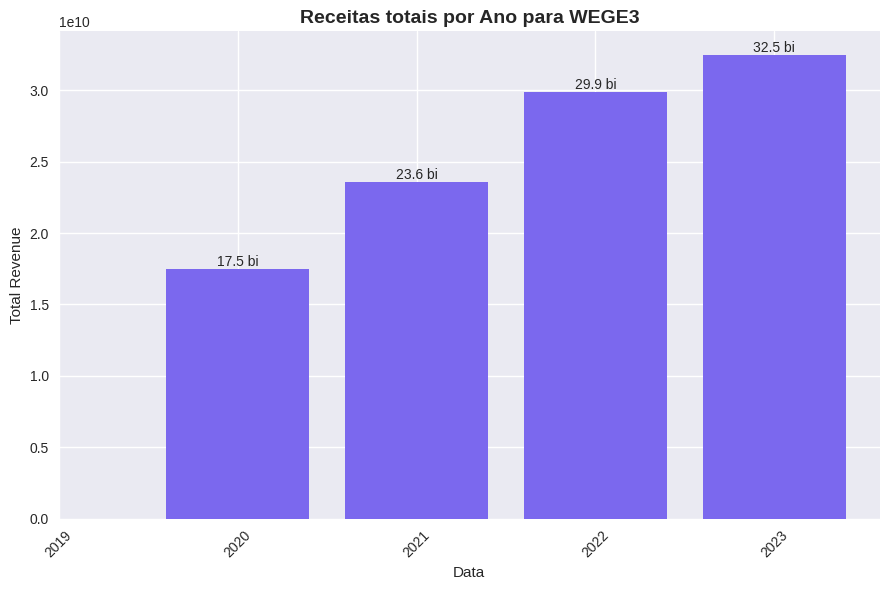

In [68]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_WEGE3['Date'], df_WEGE3['Total Revenue'], color='mediumslateblue')
plt.xlabel('Data')
plt.ylabel('Total Revenue')
plt.title('Receitas totais por Ano para WEGE3', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

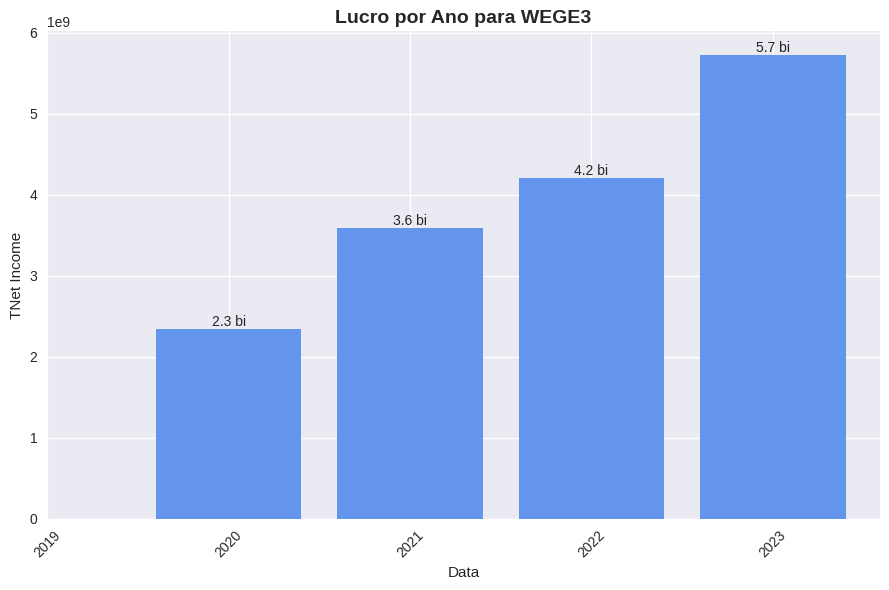

In [65]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_WEGE3['Date'], df_WEGE3['Net Income'], color='cornflowerblue')
plt.xlabel('Data')
plt.ylabel('TNet Income')
plt.title('Lucro por Ano para WEGE3', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

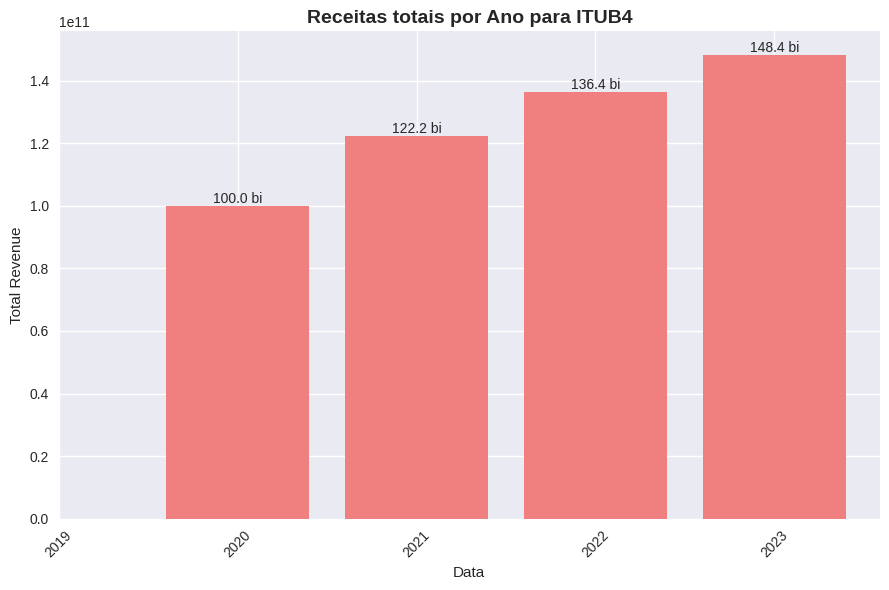

In [70]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_ITUB4['Date'], df_ITUB4['Total Revenue'], color='lightcoral')
plt.xlabel('Data')
plt.ylabel('Total Revenue')
plt.title('Receitas totais por Ano para ITUB4', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

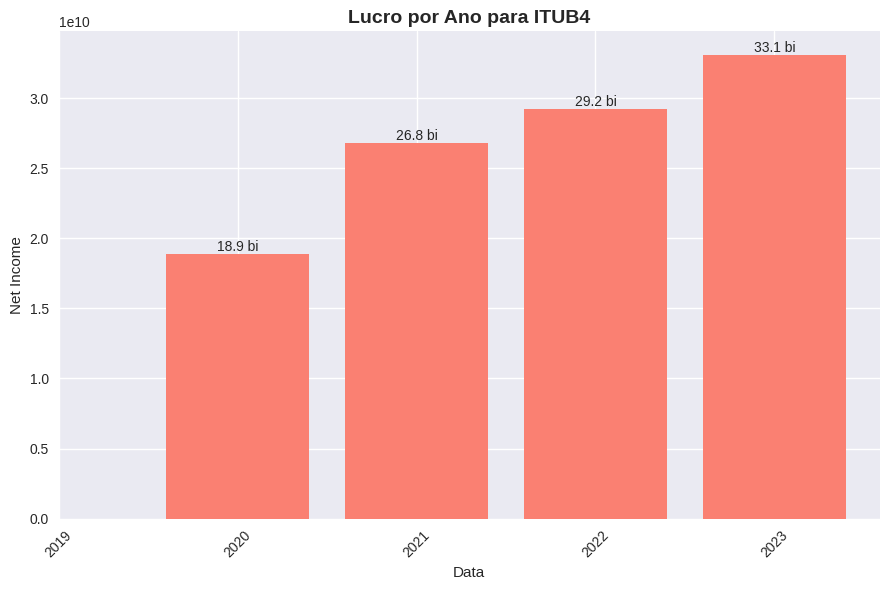

In [71]:
# Visualizar as Receitas Totais por Ano da WEGE3
plt.figure(figsize=(9, 6))
bars = plt.bar(df_ITUB4['Date'], df_ITUB4['Net Income'], color='salmon')
plt.xlabel('Data')
plt.ylabel('Net Income')
plt.title('Lucro por Ano para ITUB4', fontweight='bold', fontsize=14)

# Mostrar o eixo x apenas valores inteiros
plt.xticks(range(2019, 2024))

# Dar uma girada de 45° no eixo x
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/1e9:.1f} bi',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()